##### Mehdi Abbasi-Azadgoleh
##### UW Student ID: 20335400

**Question 1a)** Comparing results of Convolutional Neural Networks and Deep Neural Networks with 0, 1, 2, 3, 4 hidden layer

In [1]:
# -*- coding: utf-8 -*-
"""cifar10_cnn_cs480.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1XauljZb6cmKlEbToCi0NXU0OtSsYCPod
"""

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    #=== MY CODE (adding "history" for plotting the training accuracy plot)===
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    #==== MY CODE (adding "history" for plotting the training accuracy plot)===
    history_augment = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

**Question 1a)**  Deep Neural Networks with 0, 1, 2, 3, and 4 hidden layer

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


W0712 22:45:26.967043 140193935783808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 22:45:26.998155 140193935783808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 22:45:27.004199 140193935783808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 22:45:27.040563 140193935783808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 22:45:27.043043 140193935783808 deprecation_wrapp

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


W0712 22:45:27.175907 140193935783808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 22:45:27.183748 140193935783808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 22:45:27.717794 140193935783808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 19s 374us/step - loss: 1.7798 - acc: 0.3512 - val_loss: 1.4547 - val_acc: 0.4775
Epoch 2/20
50000/50000 [==============================] - 12s 232us/step - loss: 1.4277 - acc: 0.4852 - val_loss: 1.2554 - val_acc: 0.5523
Epoch 3/20
50000/50000 [==============================] - 12s 231us/step - loss: 1.2772 - acc: 0.5421 - val_loss: 1.2169 - val_acc: 0.5640
Epoch 4/20
50000/50000 [==============================] - 12s 232us/step - loss: 1.1685 - acc: 0.5884 - val_loss: 1.1200 - val_acc: 0.6045
Epoch 5/20
50000/50000 [==============================] - 12s 230us/step - loss: 1.0924 - acc: 0.6157 - val_loss: 1.0476 - val_acc: 0.6268
Epoch 6/20
50000/50000 [==============================] - 12s 230us/step - loss: 1.0297 - acc: 0.6354 - val_loss: 0.9663 - val_acc: 0.6576
Epoch 7/20
50000/50000 [==============================] - 12s 230us/step - loss: 0.9809

In [0]:
def model_dense_0():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


def model_dense_1():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


def model_dense_2():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


def model_dense_3():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model

def model_dense_4():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model

In [0]:
#My Code for Dense Neural Network with 0 hidden layer

batch_size = 32
num_classes = 10
epochs = 20

for i in range(5):
  num_predictions = 20
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model.h5'

  # The data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)



  if (i == 0): 
    model = model_dense_0()

  elif (i == 1):
    model = model_dense_1()  

  elif (i == 2):
    model = model_dense_2() 

  elif (i == 3):
    model = model_dense_3()

  else:
    model = model_dense_4()



  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


    # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  if (i == 0):
    history_0 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

  elif (i == 1):
    history_1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

  elif (i == 2):
    history_2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

  elif (i == 3):
    history_3 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

  else:
    history_4 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores_0 = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores_0[0])
  print('Test accuracy:', scores_0[1])


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.9792 - acc: 0.2963 - val_loss: 1.8979 - val_acc: 0.3188
Epoch 2/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.8497 - acc: 0.3542 - val_loss: 1.8240 - val_acc: 0.3683
Epoch 3/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.8156 - acc: 0.3674 - val_loss: 1.8112 - val_acc: 0.3621
Epoch 4/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.7945 - acc: 0.3781 - val_loss: 1.7874 - val_acc: 0.3832
Epoch 5/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.7809 - acc: 0.3832 - val_loss: 1.7946 - val_acc: 0.3750
Epoch 6/20
50000/50000 [==============================] - 7s 147us/step - loss: 1.7697 - acc: 0.3878 - val_loss: 1.7702 - val_acc: 0.3808
Epoch 7/20
50000/50000 [=========================

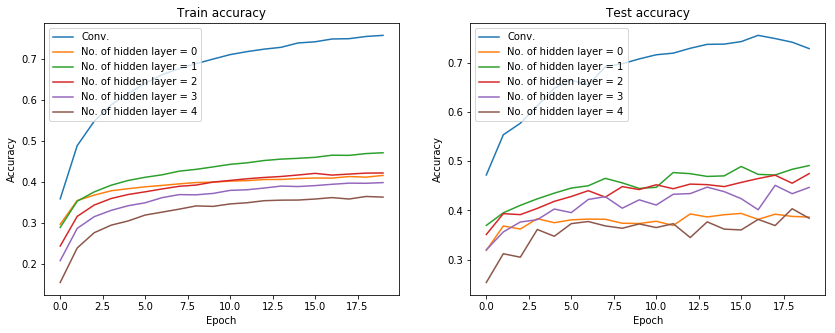

In [0]:
import matplotlib.pyplot as plt

# Plotting Train Accuracy
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)

plt.plot(history.history['acc'], label = "Conv.")
plt.plot(history_0.history['acc'], label = "No. of hidden layer = 0")
plt.plot(history_1.history['acc'], label = "No. of hidden layer = 1")
plt.plot(history_2.history['acc'], label = "No. of hidden layer = 2")
plt.plot(history_3.history['acc'], label = "No. of hidden layer = 3")
plt.plot(history_4.history['acc'], label = "No. of hidden layer = 4")

  
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting Test Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label = "Conv.")
plt.plot(history_0.history['val_acc'], label = "No. of hidden layer = 0")
plt.plot(history_1.history['val_acc'], label = "No. of hidden layer = 1")
plt.plot(history_2.history['val_acc'], label = "No. of hidden layer = 2")
plt.plot(history_3.history['val_acc'], label = "No. of hidden layer = 3")
plt.plot(history_4.history['val_acc'], label = "No. of hidden layer = 4")
  
plt.title('Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

**Question 1a Analysis**

Convolutional Neural Network has the best performance due to all the processing on the input data in Convolution and Pooling Layers which leads to efficiently extracting features from the images. 

For Deep Neural Networks applying on this Data Set the overal accuracy decreases as the number of hidden layer(s) increases which is as opposed to general cases.

My justification is that we use dropout since we thought that we would have overfitting for this problem. However, overfitting happens when the number of parameters is larger than amount of data (which is the case when using Convolutional NN with many parameters). However, when using Deep NN for this case, the number of data point is more. So, we do not have overfitting. if we delet dropout from NN layers we see that the deeper the NN, the higher the accuracy.   

**Qusetion 1b)** Rectified Linear Unit Repleaced by Sigmoid (*Code Not Required*)

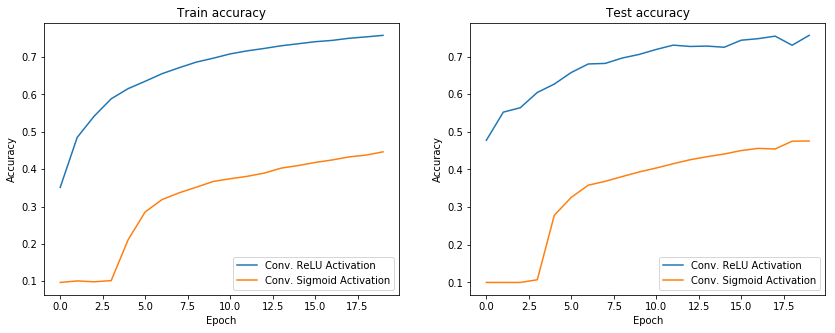

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label = "Conv. ReLU Activation")
plt.plot(history_sigmoid.history['acc'], label = "Conv. Sigmoid Activation")
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label = "Conv. ReLU Activation")
plt.plot(history_sigmoid.history['val_acc'], label = "Conv. Sigmoid Activation")
plt.title('Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


**Question 1b Analysis**

The accuracy has been reduced dramatically when "Sigmoid" acivation function is used instead of "Rectified Linear Unit." 

This is because of "Gradiant Vanishing" issue. 

In back propagation sigmoid function and its deravative appears which are both a number between [0, 1]. As we move towards the very first layers more of these numbers are multiplied together which leads to small adjusment for weights in first layers. Practically, the weights of the first layers remain the same as once they were selected randomly  

**Question 1c)** Dropout and Augmentation Effects (*Code Not Required*)

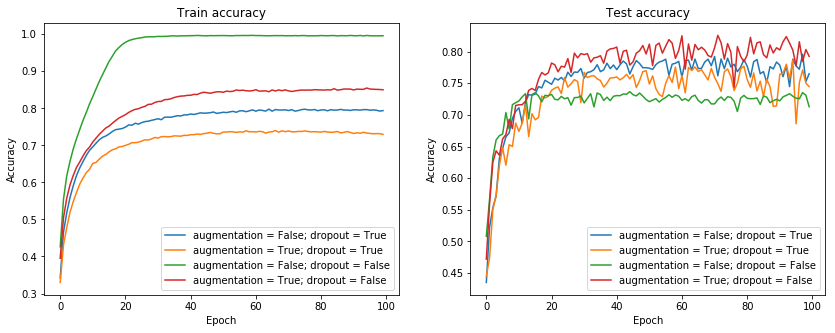

In [13]:
import matplotlib.pyplot as plt

# Plotting Train Accuracy
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)

plt.plot(history_CNN.history['acc'], label = "augmentation = False; dropout = True")
plt.plot(history_augment_CNN.history['acc'], label = "augmentation = True; dropout = True")
plt.plot(history_noDropout.history['acc'], label = "augmentation = False; dropout = False")
plt.plot(history_augment_noDropout.history['acc'], label = "augmentation = True; dropout = False")


  
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting Test Accuracy
plt.subplot(1,2,2)
plt.plot(history_CNN.history['val_acc'], label = "augmentation = False; dropout = True")
plt.plot(history_augment_CNN.history['val_acc'], label = "augmentation = True; dropout = True")
plt.plot(history_noDropout.history['val_acc'], label = "augmentation = False; dropout = False")
plt.plot(history_augment_noDropout.history['val_acc'], label = "augmentation = True; dropout = False")
  
plt.title('Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

**Question 1c Analysis**

Dropout and augmentation are solutions for the overfitting problem which show itself in testing set.

So for training set when we do not have dropout and augmentation, as we expect, since there is less variation in the (1) input feed and in the (2) network (less disturbance), we have the highest accuracy, while when both (Augm. + Drop.) are true we have the lowest accuracy because we have more variations in learning process. Finally, when just one of them (Augm. + Drop.) is true the accuracy is almost the same (augmentation do a bit better than dropout with the setting of this example)

However, in testing accuracy, the neural networks that were equiped with a solution to overcome overfitting problem, performs better. The rank of NNs in terms of test accuracy is as below; 

1) the NN with **Augmentation** = True

2) the NN with **Dropout** = True

3) NN with **Augmentation & Dropout** = True 

4) NN with no solution for overfitting

When just one of the solutions (eirher augmentation or dropout ) is used the performance is better than when both are True. This is because when both are used, too many variations (in the input and in the network structure) are imposed to the network and it cannot efficiently learn the patterns.  

**Qustion 1d)** Comparing different optimizer (*Code Not Required*)


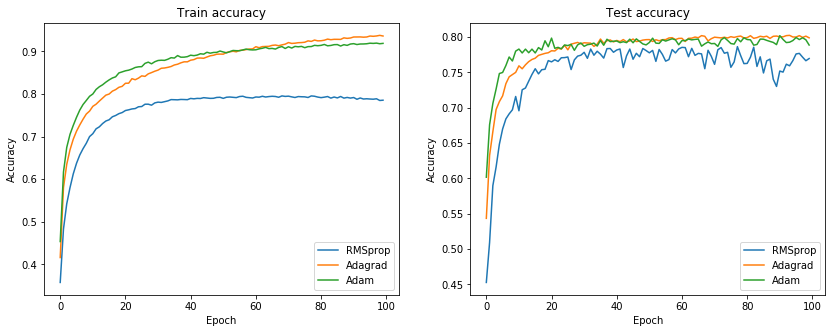

In [8]:
import matplotlib.pyplot as plt

# Plotting Train Accuracy
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)

plt.plot(history_CNN.history['acc'], label = "RMSprop")
plt.plot(history_adagard.history['acc'], label = "Adagrad")
plt.plot(history_adam.history['acc'], label = "Adam")

plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting Test Accuracy
plt.subplot(1,2,2)
plt.plot(history_CNN.history['val_acc'], label = "RMSprop")
plt.plot(history_adagard.history['val_acc'], label = "Adagrad")
plt.plot(history_adam.history['val_acc'], label = "Adam")
  
plt.title('Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

**Question 1d Analysis** 

Adam vs. other optimizers is faster ( having higher momentum) in finding a good solution. 

Adagrad is a slower than Adam but eventually reach a higher accuracy compared to Adam with parameters being set to default. 

RMSprop performance in $training$-set is by far worse than the other optimizers and the learning rate decays too quickly. However, in $testing$-set, although it has still lower performance than the others, the difference between the accuracy reached through this approach and the others is not that much. 

**Question 1e)** Different Stack & Filter

In [10]:
# -*- coding: utf-8 -*-
"""cifar10_cnn_cs480.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1XauljZb6cmKlEbToCi0NXU0OtSsYCPod
"""

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    #=== MY CODE (adding "history" for plotting the training accuracy plot)===
    history_filter = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    #==== MY CODE (adding "history" for plotting the training accuracy plot)===
    history_augment_filter = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 222us/step - loss: 1.7923 - acc: 0.3508 - val_loss: 1.5032 - val_acc: 0.4761
Epoch 2/100
50000/50000 [==============================] - 10s 203us/step - loss: 1.4685 - acc: 0.4748 - val_loss: 1.3719 - val_acc: 0.5125
Epoch 3/100
50000/50000 [==============================] - 10s 206us/step - loss: 1.3368 - acc: 0.5239 - val_loss: 1.2356 - val_acc: 0.5711
Epoch 4/100
50000/50000 [==============================] - 10s 203us/step - loss: 1.2440 - acc: 0.5579 - val_loss: 1.1497 - val_acc: 0.6038
Epoch 5/100
50000/50000 [==============================] - 10s 203us/step - loss: 1.1742 - acc: 0.5852 - val_loss: 1.1483 - val_acc: 0.5964
Epoch 6/100
50000/50000 [==============================] - 10s 205us/step - loss: 1.1146 - acc: 0.6079 - val_loss: 1.0447 - val_acc: 0.6413
Epoch 7/

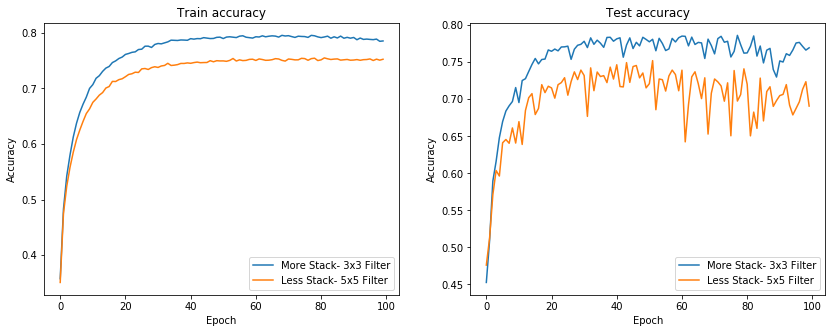

In [12]:
# Plotting Train Accuracy
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)

plt.plot(history_CNN.history['acc'], label = "More Stack- 3x3 Filter")
plt.plot(history_filter.history['acc'], label = "Less Stack- 5x5 Filter")

  
plt.title('Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting Test Accuracy
plt.subplot(1,2,2)
plt.plot(history_CNN.history['val_acc'], label = "More Stack- 3x3 Filter")
plt.plot(history_filter.history['val_acc'], label = "Less Stack- 5x5 Filter")
  
plt.title('Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

**Question 1.e Analysis**

Based on VGG (Visual Geometry Group at Oxford, 2014): stack of small filters is often, preferred to single large filter because we have;

– Fewer parameters

– Deeper network

The graphs confirm this matter. As can be seen the accuracy of the network with smaller filter and more stack has increased. 

**Question 2**

Q2.a) No. 

The answer is no, since the output of Convolutions layer which then will be flattened and fed to the Softmax output layer as a feature vector will change when translation occures (the position of the elements of the output matrix will change). Then this changed feature vector will multiplied by the fixed-position weights learned based on the original picture (before translation) which does not necessarily produce the same result. So, in this example we cannot get the same result as before and as a result the network is not invariant to translation.

Q2.b) Yes. 

Yes
In this structure we have two hidden layers as below; 

CONV[5x5] – MAX POOL [4x4]

CONV[5x5] – MAX POOL [4x4]

And a Softmax output layer. 

In the first input layer each 16 pixels will reduced to 1 pixel. So, 10-pixel translation in the original image will be equivalent to 2.5-pixel translation in the compressed picture after the first hidden layer. Then this picture will go through the second layer with 4x4 pooling screen. Since 2.5 is less than the size of pooling screen (4) so this translation will not change the output of second layer. 
